<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [ ]:
# %pip install seaborn
# import piplite

# await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")
file_name  = "dataset.csv"

In [3]:
df = pd.read_csv(URL)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


---


# Test Environment


In [6]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
description = df.describe(include='all')
print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

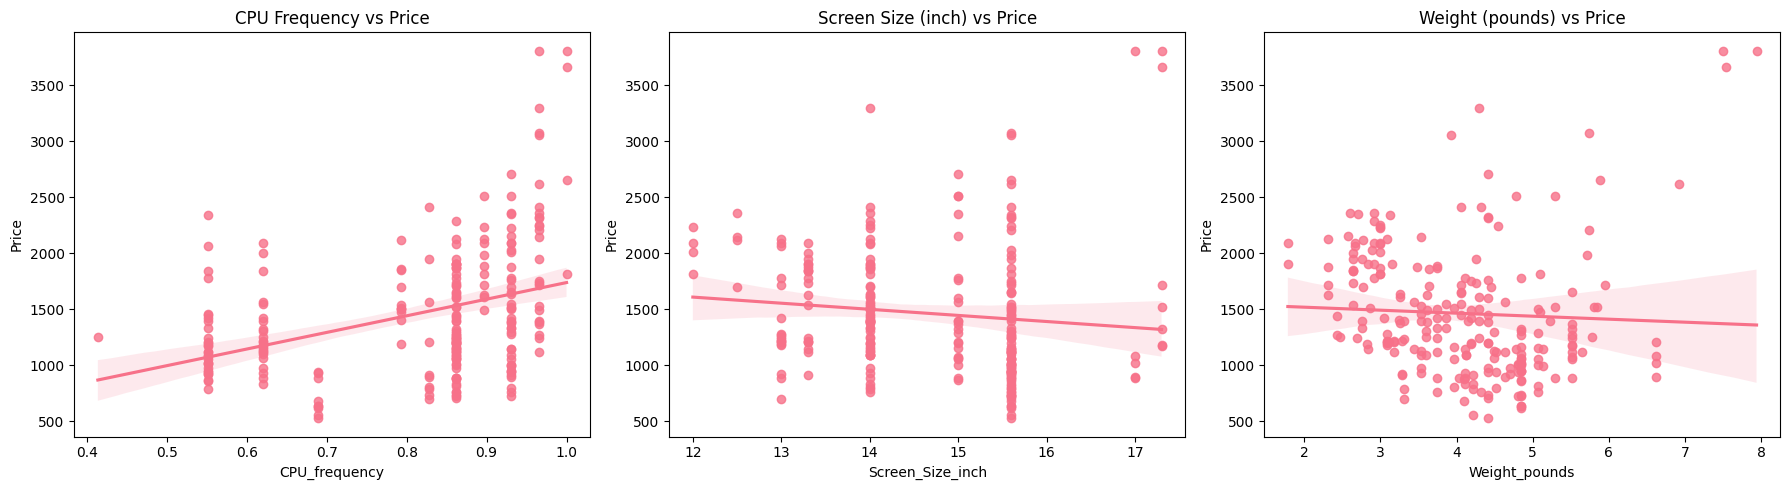

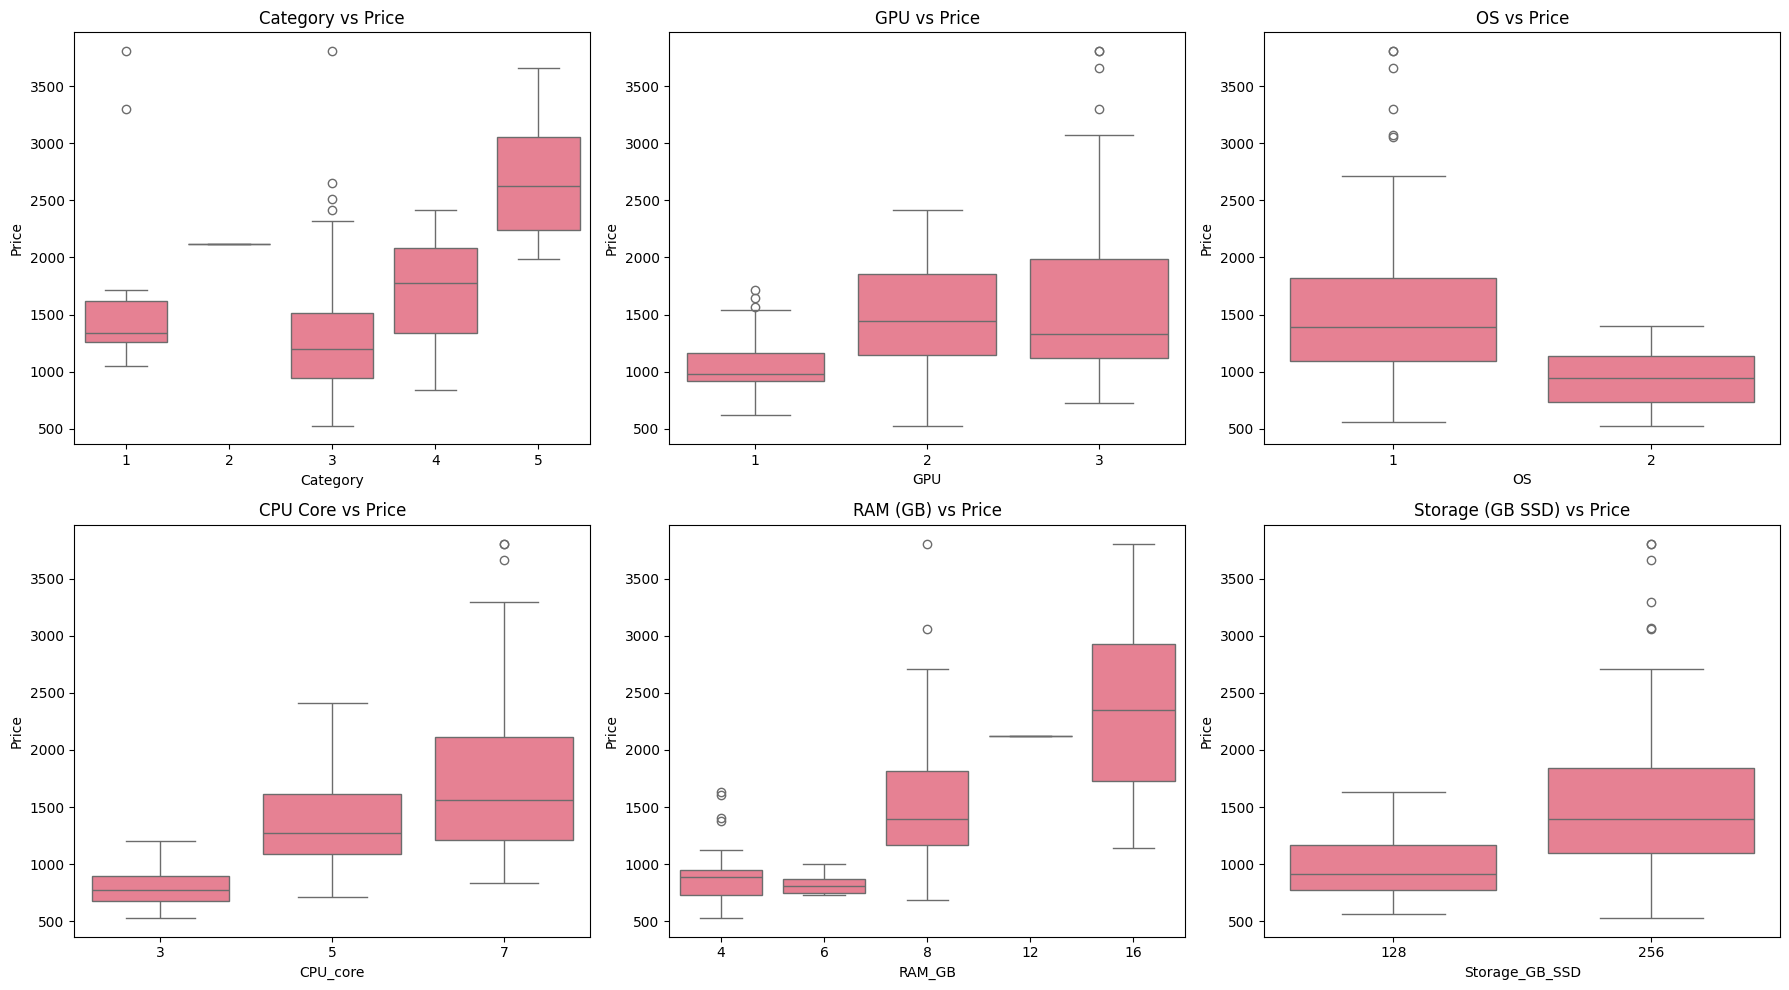

In [8]:
# Regression plots for selected attributes vs Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(x="CPU_frequency", y="Price", data=df, ax=axes[0])
axes[0].set_title("CPU Frequency vs Price")
sns.regplot(x="Screen_Size_inch", y="Price", data=df, ax=axes[1])
axes[1].set_title("Screen Size (inch) vs Price")
sns.regplot(x="Weight_pounds", y="Price", data=df, ax=axes[2])
axes[2].set_title("Weight (pounds) vs Price")
plt.tight_layout()
plt.show()

# Box plots for categorical/numeric attributes vs Price
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(x="Category", y="Price", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Category vs Price")
sns.boxplot(x="GPU", y="Price", data=df, ax=axes[0, 1])
axes[0, 1].set_title("GPU vs Price")
sns.boxplot(x="OS", y="Price", data=df, ax=axes[0, 2])
axes[0, 2].set_title("OS vs Price")
sns.boxplot(x="CPU_core", y="Price", data=df, ax=axes[1, 0])
axes[1, 0].set_title("CPU Core vs Price")
sns.boxplot(x="RAM_GB", y="Price", data=df, ax=axes[1, 1])
axes[1, 1].set_title("RAM (GB) vs Price")
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df, ax=axes[1, 2])
axes[1, 2].set_title("Storage (GB SSD) vs Price")
plt.tight_layout()
plt.show()

Creating Regression Plots...


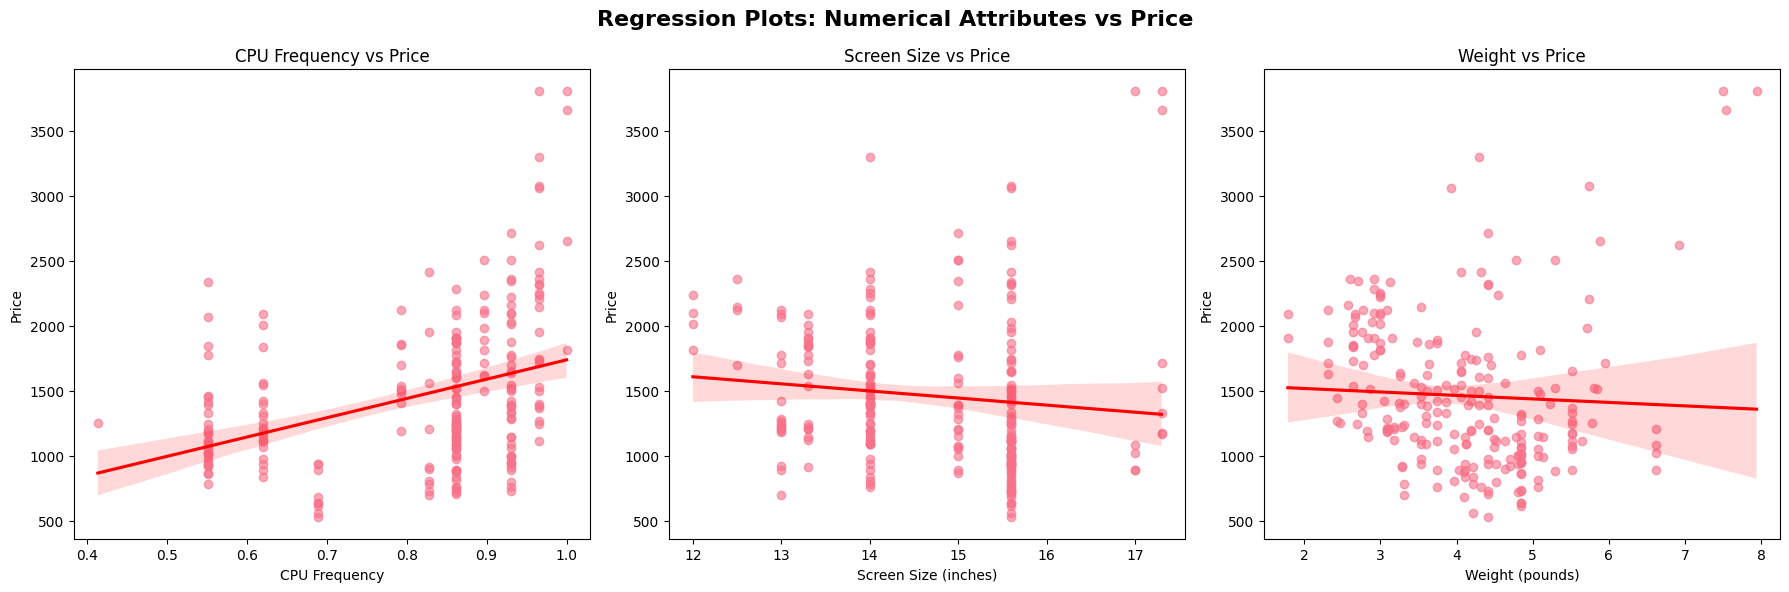

Creating Box Plots...


<Axes: xlabel='CPU_core', ylabel='Price'>

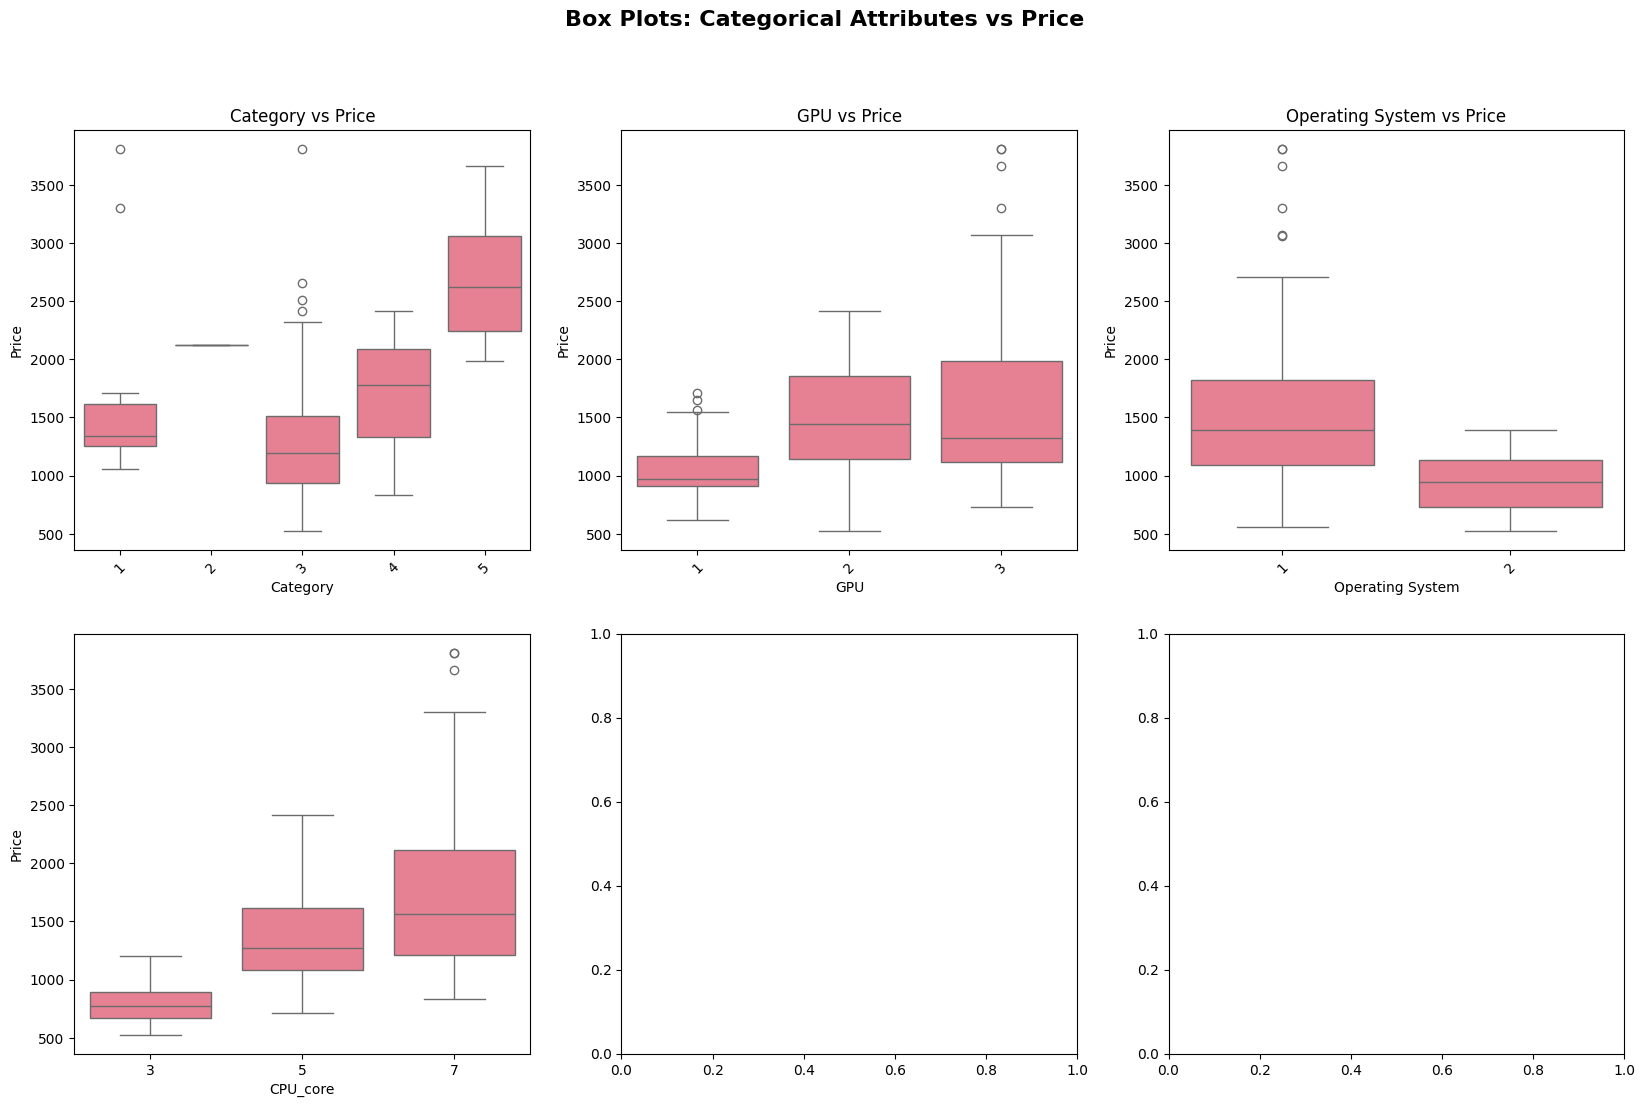

In [7]:
# Set the style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Assuming you have a DataFrame called 'df' with your data
# If you need to load data, uncomment and modify the following line:
# df = pd.read_csv('your_data_file.csv')

# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (15, 10)

# 1. REGRESSION PLOTS
print("Creating Regression Plots...")

# Create a figure with subplots for regression plots
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))
fig1.suptitle('Regression Plots: Numerical Attributes vs Price', fontsize=16, fontweight='bold')

# Regression plot 1: CPU_frequency vs Price
sns.regplot(data=df, x='CPU_frequency', y='Price', ax=axes1[0], 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes1[0].set_title('CPU Frequency vs Price')
axes1[0].set_xlabel('CPU Frequency')
axes1[0].set_ylabel('Price')

# Regression plot 2: Screen_Size_inch vs Price
sns.regplot(data=df, x='Screen_Size_inch', y='Price', ax=axes1[1], 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes1[1].set_title('Screen Size vs Price')
axes1[1].set_xlabel('Screen Size (inches)')
axes1[1].set_ylabel('Price')

# Regression plot 3: Weight_pounds vs Price
sns.regplot(data=df, x='Weight_pounds', y='Price', ax=axes1[2], 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes1[2].set_title('Weight vs Price')
axes1[2].set_xlabel('Weight (pounds)')
axes1[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

# 2. BOX PLOTS
print("Creating Box Plots...")

# Create a figure with subplots for box plots
fig2, axes2 = plt.subplots(2, 3, figsize=(20, 12))
fig2.suptitle('Box Plots: Categorical Attributes vs Price', fontsize=16, fontweight='bold')

# Box plot 1: Category vs Price
sns.boxplot(data=df, x='Category', y='Price', ax=axes2[0, 0])
axes2[0, 0].set_title('Category vs Price')
axes2[0, 0].set_xlabel('Category')
axes2[0, 0].set_ylabel('Price')
axes2[0, 0].tick_params(axis='x', rotation=45)

# Box plot 2: GPU vs Price
sns.boxplot(data=df, x='GPU', y='Price', ax=axes2[0, 1])
axes2[0, 1].set_title('GPU vs Price')
axes2[0, 1].set_xlabel('GPU')
axes2[0, 1].set_ylabel('Price')
axes2[0, 1].tick_params(axis='x', rotation=45)

# Box plot 3: OS vs Price
sns.boxplot(data=df, x='OS', y='Price', ax=axes2[0, 2])
axes2[0, 2].set_title('Operating System vs Price')
axes2[0, 2].set_xlabel('Operating System')
axes2[0, 2].set_ylabel('Price')
axes2[0, 2].tick_params(axis='x', rotation=45)

# Box plot 4: CPU_core vs Price
sns.boxplot(data=df, x='CPU_core', y='Price', ax=axes2[1, 0])

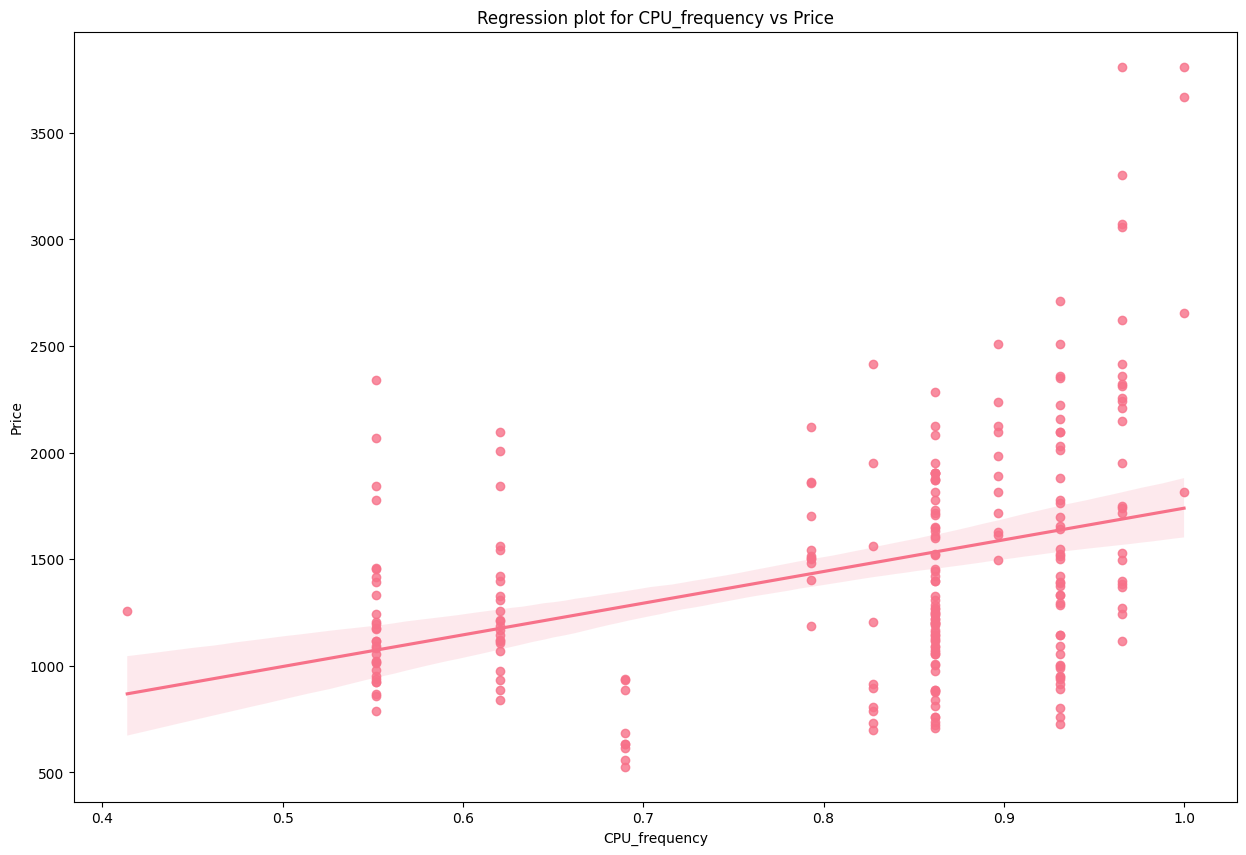

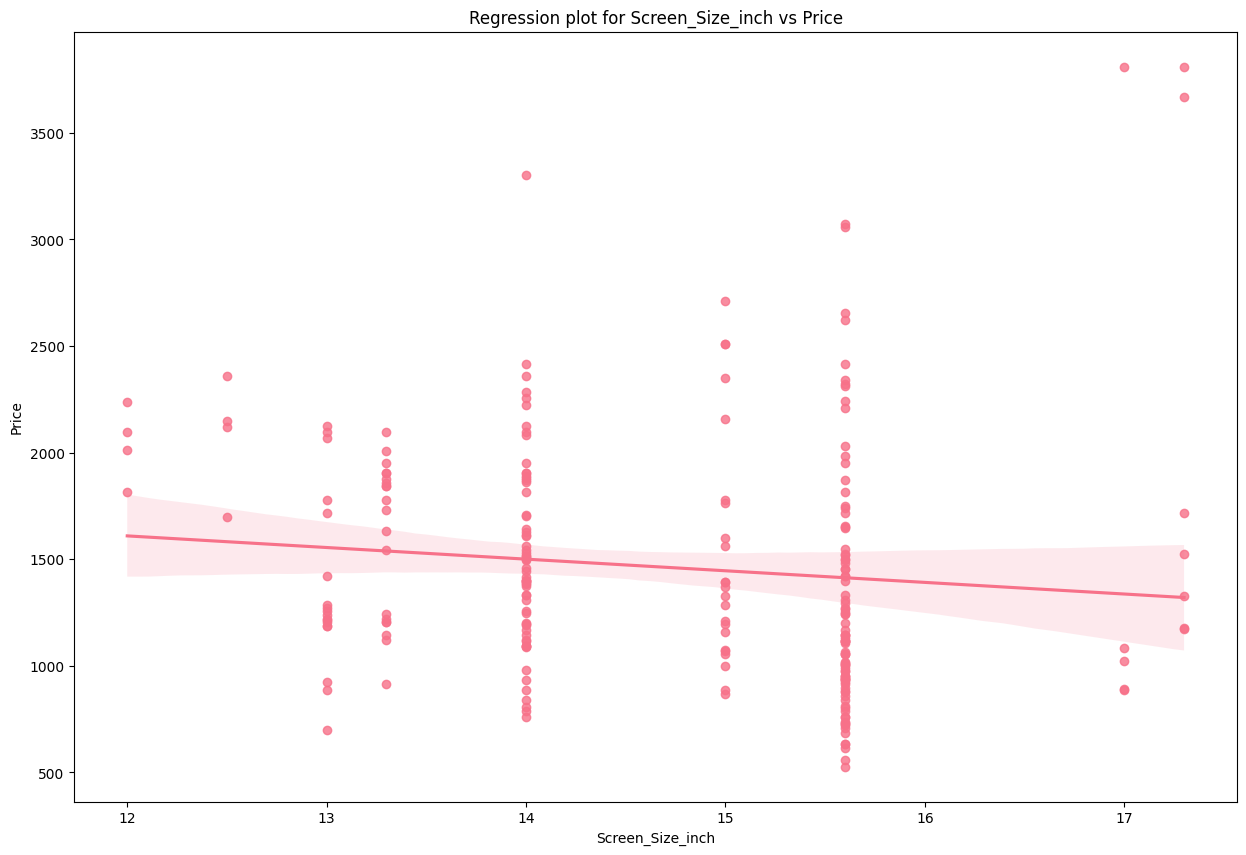

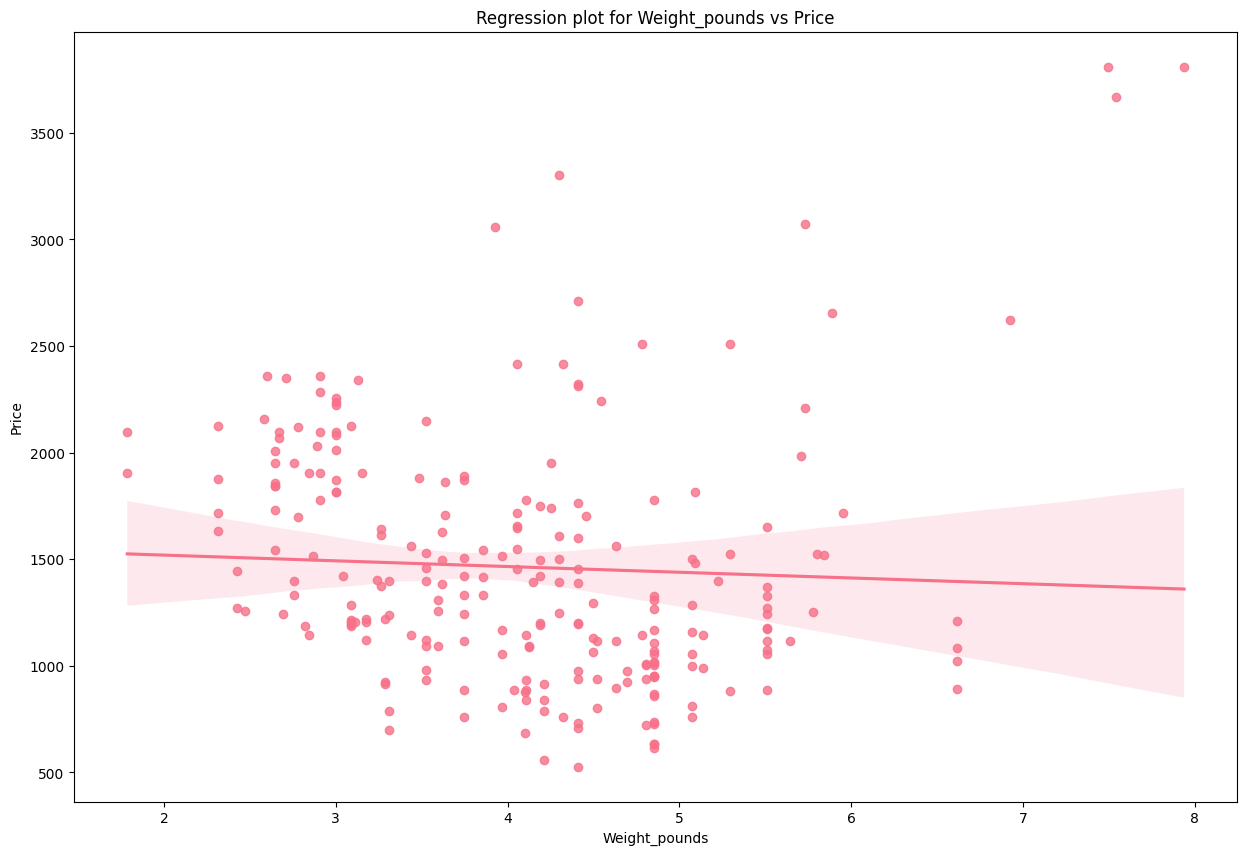

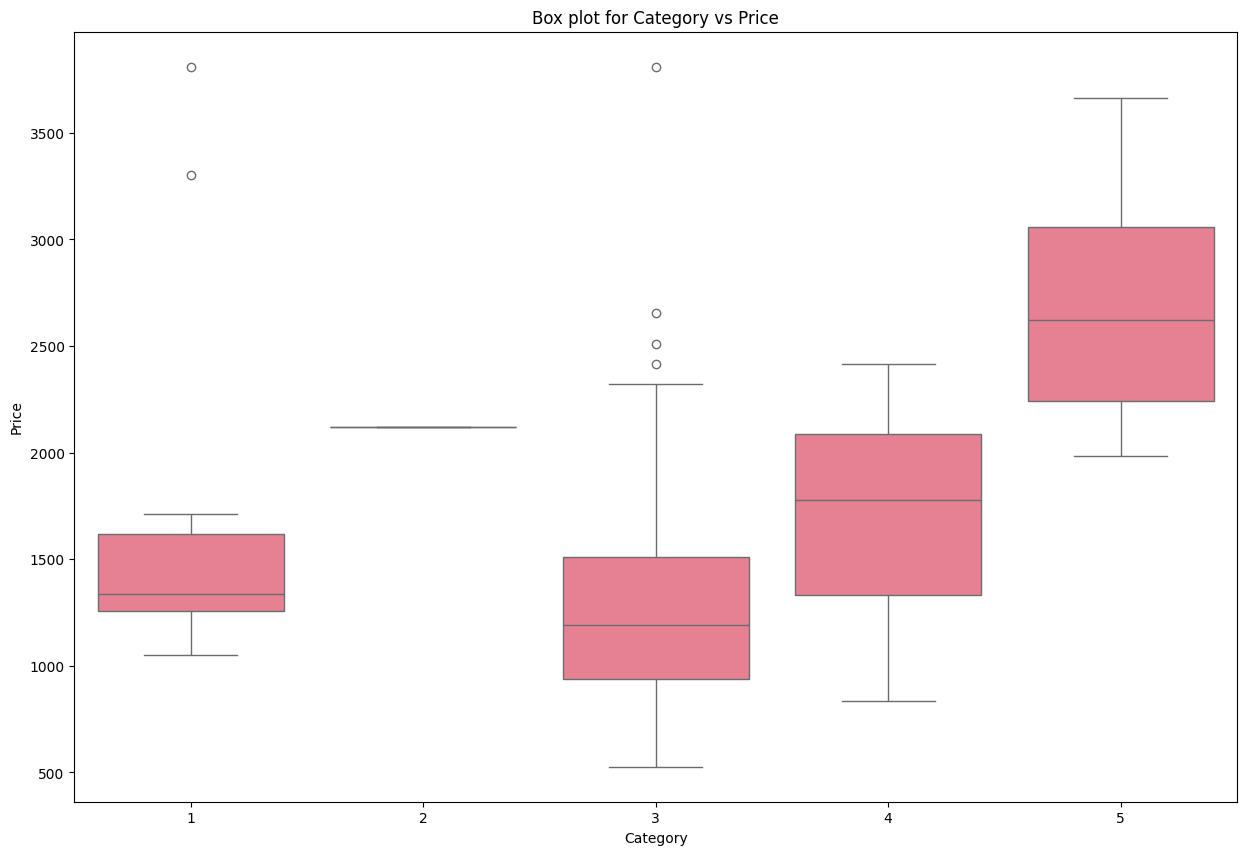

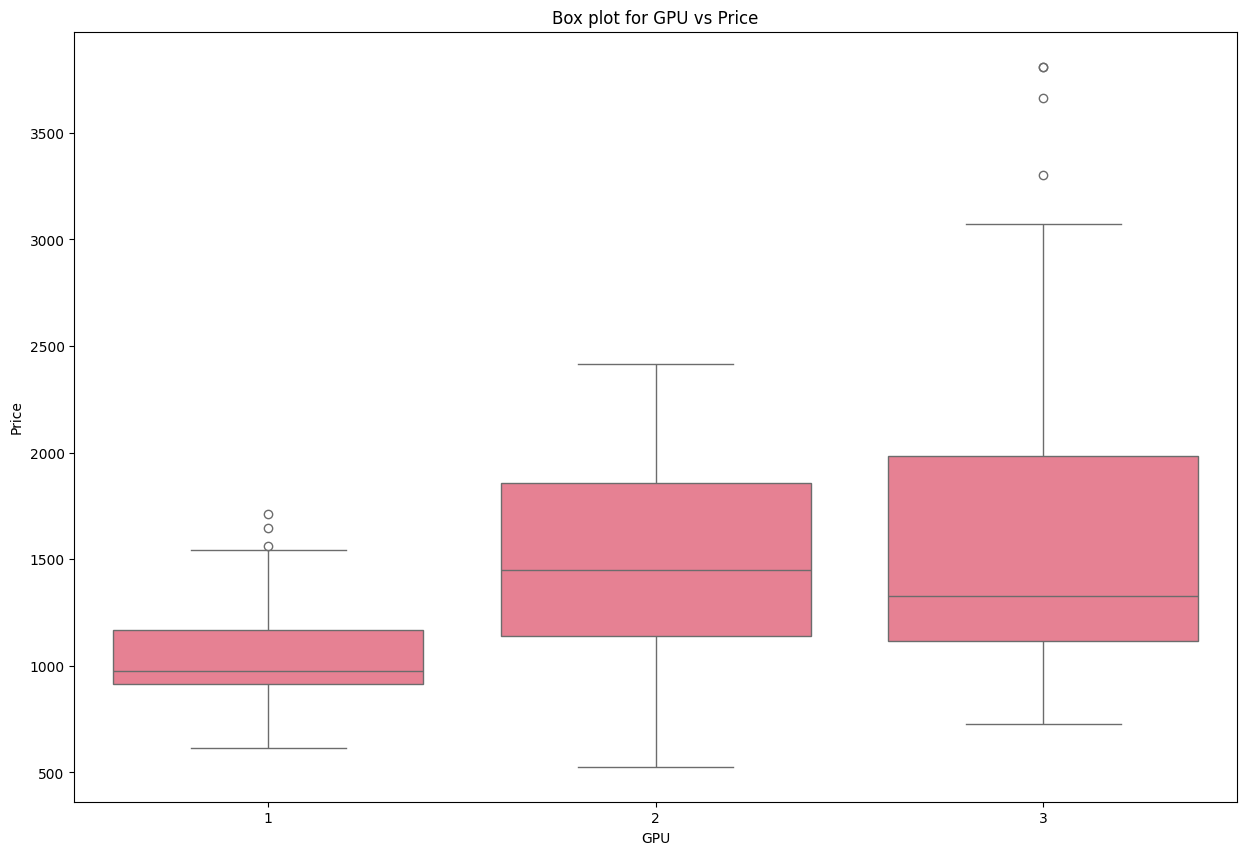

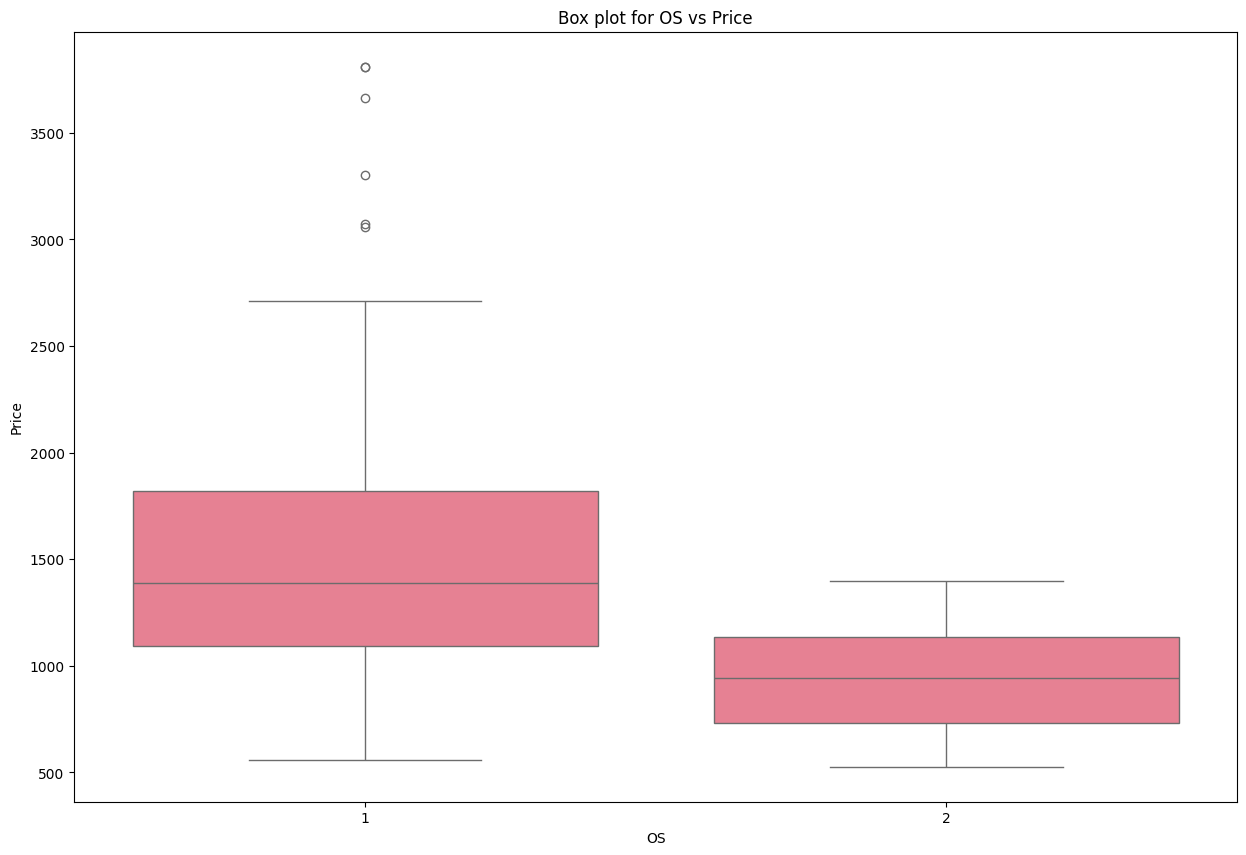

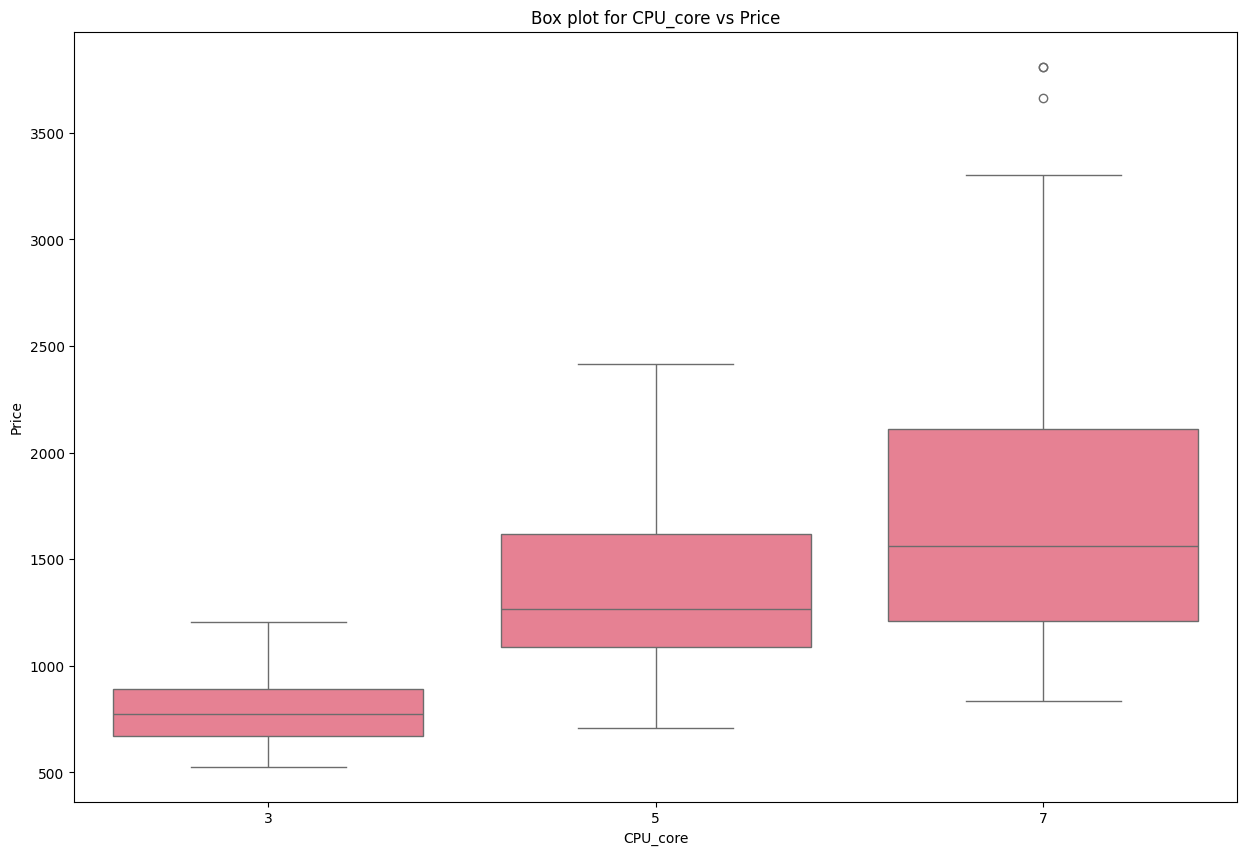

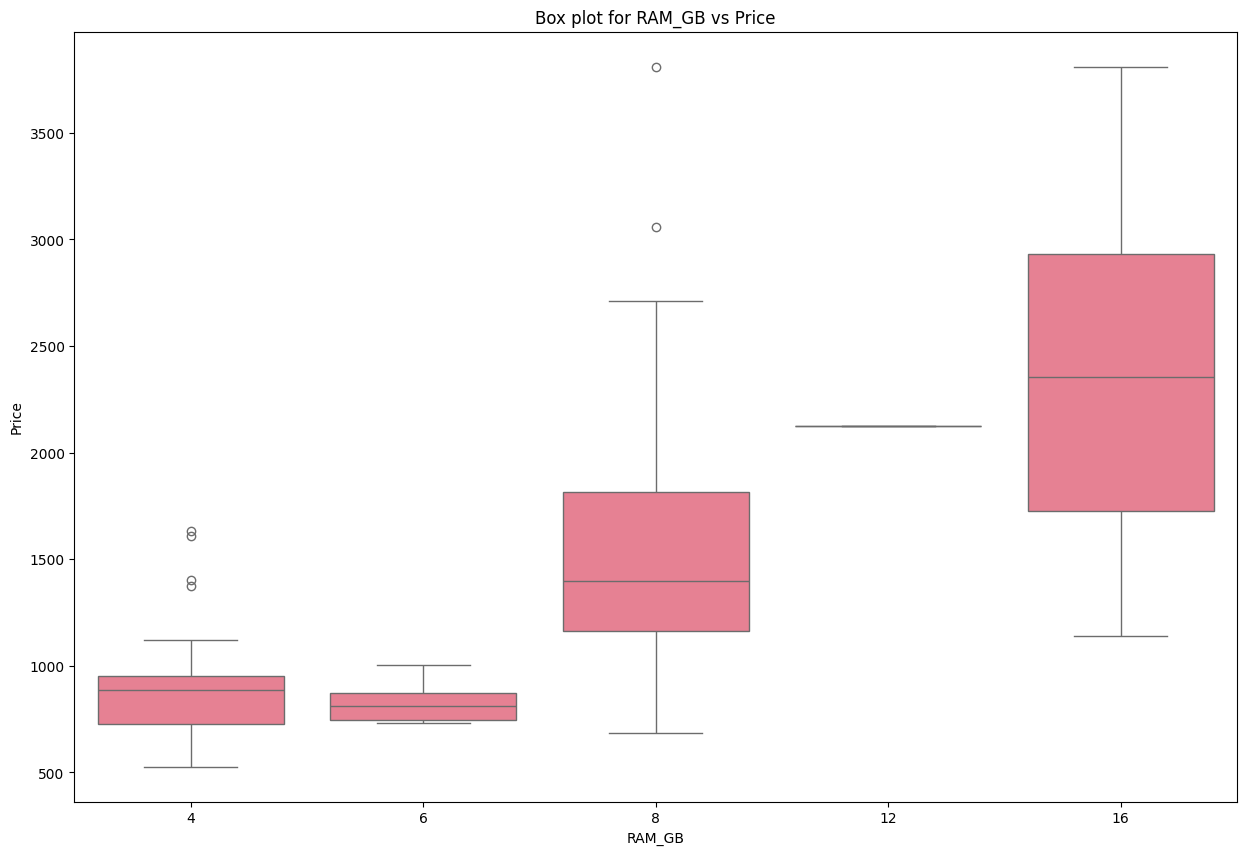

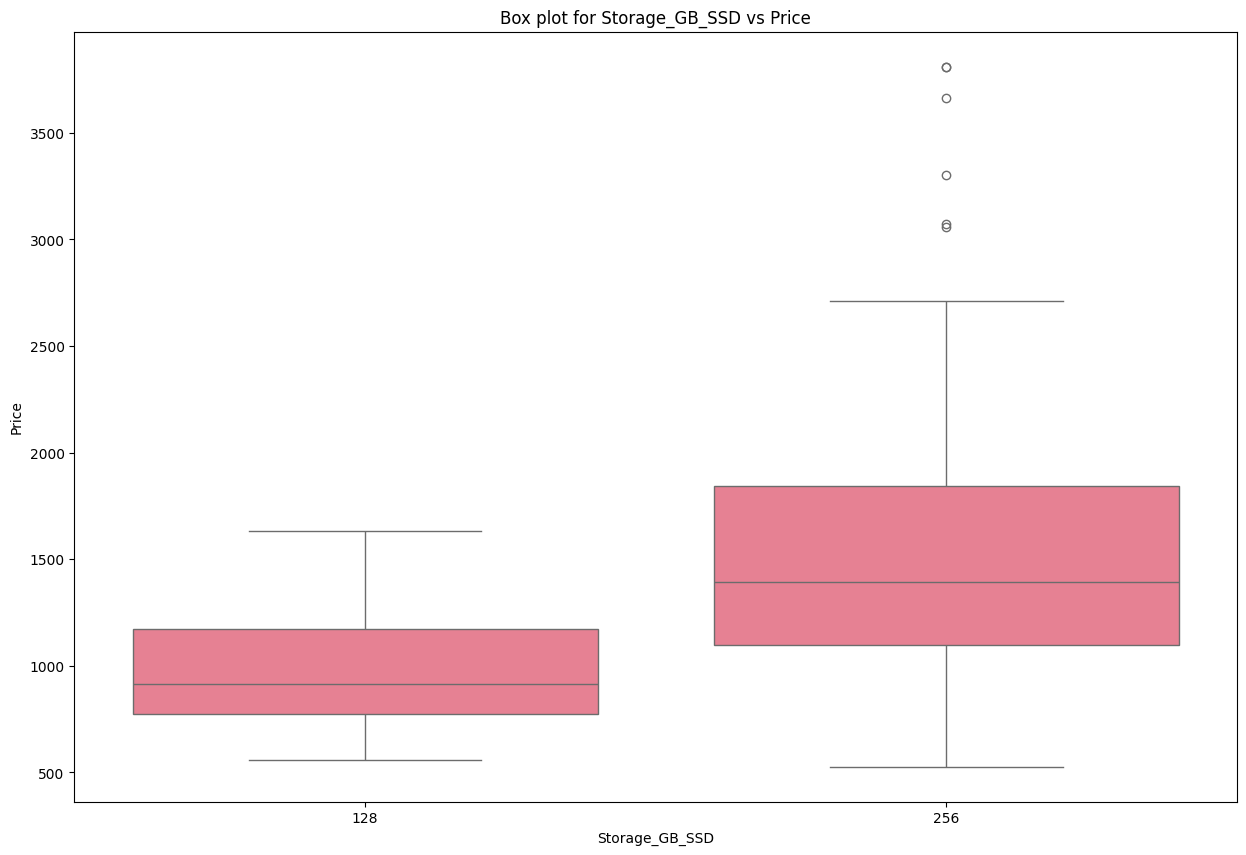

In [9]:

# 1. Create regression plots

regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()
# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [10]:
from scipy.stats import pearsonr

def evaluate_correlations_with_price(df, target_column='Price'):
    """
    Evaluate correlation values, Pearson coefficients and p-values 
    for all numerical attributes against the target attribute.
    
    Parameters:
    df: DataFrame containing the data
    target_column: Name of the target column (default: 'Price')
    
    Returns:
    DataFrame with correlation statistics
    """
    
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove the target column from the list to avoid self-correlation
    if target_column in numerical_columns:
        numerical_columns.remove(target_column)
    
    # Initialize lists to store results
    attributes = []
    correlation_coefficients = []
    pearson_coefficients = []
    p_values = []
    
    print(f"Evaluating correlations with {target_column}...")
    print("=" * 60)
    
    # Calculate correlations for each numerical attribute
    for column in numerical_columns:
        # Remove rows with missing values for both columns
        clean_data = df[[column, target_column]].dropna()
        
        if len(clean_data) > 1:  # Need at least 2 data points for correlation
            # Method 1: Using pandas corr() method
            correlation_coeff = clean_data[column].corr(clean_data[target_column])
            
            # Method 2: Using scipy.stats.pearsonr for coefficient and p-value
            pearson_coeff, p_value = pearsonr(clean_data[column], clean_data[target_column])
            
            # Store results
            attributes.append(column)
            correlation_coefficients.append(correlation_coeff)
            pearson_coefficients.append(pearson_coeff)
            p_values.append(p_value)
            
        else:
            print(f"Warning: Not enough data points for {column}")
    
    # Create results dataframe
    results_df = pd.DataFrame({
        'Attribute': attributes,
        'Correlation_Coefficient': correlation_coefficients,
        'Pearson_Coefficient': pearson_coefficients,
        'P_Value': p_values
    })
    
    # Round values for better readability
    results_df['Correlation_Coefficient'] = results_df['Correlation_Coefficient'].round(4)
    results_df['Pearson_Coefficient'] = results_df['Pearson_Coefficient'].round(4)
    results_df['P_Value'] = results_df['P_Value'].round(6)
    
    # Add significance level interpretation
    results_df['Significance'] = results_df['P_Value'].apply(
        lambda x: 'Highly Significant (p < 0.001)' if x < 0.001
        else 'Significant (p < 0.05)' if x < 0.05
        else 'Not Significant (p >= 0.05)'
    )
    
    # Add correlation strength interpretation
    results_df['Correlation_Strength'] = results_df['Correlation_Coefficient'].apply(
        lambda x: 'Very Strong' if abs(x) >= 0.8
        else 'Strong' if abs(x) >= 0.6
        else 'Moderate' if abs(x) >= 0.4
        else 'Weak' if abs(x) >= 0.2
        else 'Very Weak'
    )
    
    # Sort by absolute correlation coefficient in descending order
    results_df['Abs_Correlation'] = abs(results_df['Correlation_Coefficient'])
    results_df = results_df.sort_values('Abs_Correlation', ascending=False)
    results_df = results_df.drop('Abs_Correlation', axis=1)
    
    return results_df


In [11]:
evaluate_correlations_with_price(df)

Evaluating correlations with Price...


,Attribute,Correlation_Coefficient,Pearson_Coefficient,P_Value,Significance,Correlation_Strength
8,RAM_GB,0.5493,0.5493,0.000000,Highly Significant (p < 0.001),Moderate
5,CPU_core,0.4594,0.4594,0.000000,Highly Significant (p < 0.001),Moderate
7,CPU_frequency,0.3667,0.3667,0.000000,Highly Significant (p < 0.001),Weak
1,Unnamed: 0,0.3219,0.3219,0.000000,Highly Significant (p < 0.001),Weak
0,Unnamed: 0.1,0.3219,0.3219,0.000000,Highly Significant (p < 0.001),Weak
3,GPU,0.2883,0.2883,0.000006,Highly Significant (p < 0.001),Weak
2,Category,0.2862,0.2862,0.000007,Highly Significant (p < 0.001),Weak
9,Storage_GB_SSD,0.2434,0.2434,0.000149,Highly Significant (p < 0.001),Weak
4,OS,-0.2217,-0.2217,0.000570,Highly Significant (p < 0.001),Weak
6,Screen_Size_inch,-0.1106,-0.1106,0.088534,Not Significant (p >= 0.05),Very Weak


In [ ]:
# Evaluate correlations with Price using the existing function
correlation_results = evaluate_correlations_with_price(df, 'Price')

# Display the results
print("Correlation Analysis Results:")
print("=" * 80)
print(correlation_results.to_string(index=False))

# Additional summary statistics
print("\n" + "=" * 80)
print("SUMMARY INSIGHTS:")
print("=" * 80)

# Find strongest correlations
strongest_positive = correlation_results.loc[correlation_results['Correlation_Coefficient'].idxmax()]
strongest_negative = correlation_results.loc[correlation_results['Correlation_Coefficient'].idxmin()]

print(f"Strongest Positive Correlation: {strongest_positive['Attribute']} ({strongest_positive['Correlation_Coefficient']:.4f})")
print(f"Strongest Negative Correlation: {strongest_negative['Attribute']} ({strongest_negative['Correlation_Coefficient']:.4f})")

# Count significant correlations
significant_correlations = correlation_results[correlation_results['P_Value'] < 0.05]
print(f"Number of Statistically Significant Correlations: {len(significant_correlations)}")

# Display only significant correlations
if len(significant_correlations) > 0:
    print("\nStatistically Significant Correlations (p < 0.05):")
    print("-" * 60)
    print(significant_correlations[['Attribute', 'Correlation_Coefficient', 'P_Value', 'Correlation_Strength']].to_string(index=False))

Evaluating correlations with Price...
Correlation Analysis Results:
       Attribute  Correlation_Coefficient  Pearson_Coefficient  P_Value                   Significance Correlation_Strength
          RAM_GB                   0.5493               0.5493 0.000000 Highly Significant (p < 0.001)             Moderate
        CPU_core                   0.4594               0.4594 0.000000 Highly Significant (p < 0.001)             Moderate
   CPU_frequency                   0.3667               0.3667 0.000000 Highly Significant (p < 0.001)                 Weak
      Unnamed: 0                   0.3219               0.3219 0.000000 Highly Significant (p < 0.001)                 Weak
    Unnamed: 0.1                   0.3219               0.3219 0.000000 Highly Significant (p < 0.001)                 Weak
             GPU                   0.2883               0.2883 0.000006 Highly Significant (p < 0.001)                 Weak
        Category                   0.2862               0.2862 0

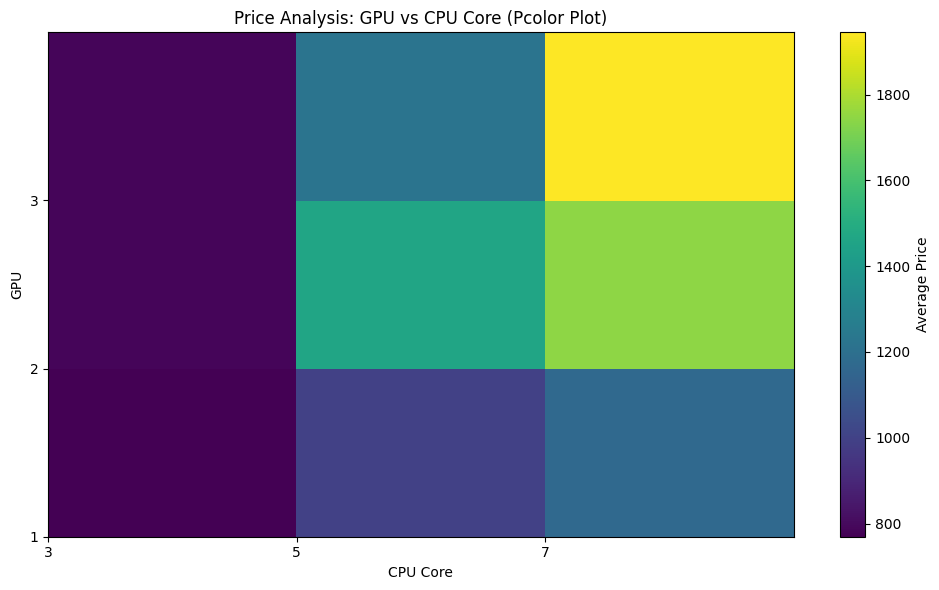

Pivot Table - Average Price by GPU and CPU Core:
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


In [13]:
# Group the attributes and create pivot table
pivot_table = df.pivot_table(values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Create pcolor plot
plt.figure(figsize=(10, 6))
plt.pcolor(pivot_table, cmap='viridis')
plt.colorbar(label='Average Price')
plt.title('Price Analysis: GPU vs CPU Core (Pcolor Plot)')
plt.xlabel('CPU Core')
plt.ylabel('GPU')

# Set tick labels
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

plt.tight_layout()
plt.show()

# Display the pivot table
print("Pivot Table - Average Price by GPU and CPU Core:")
print(pivot_table)

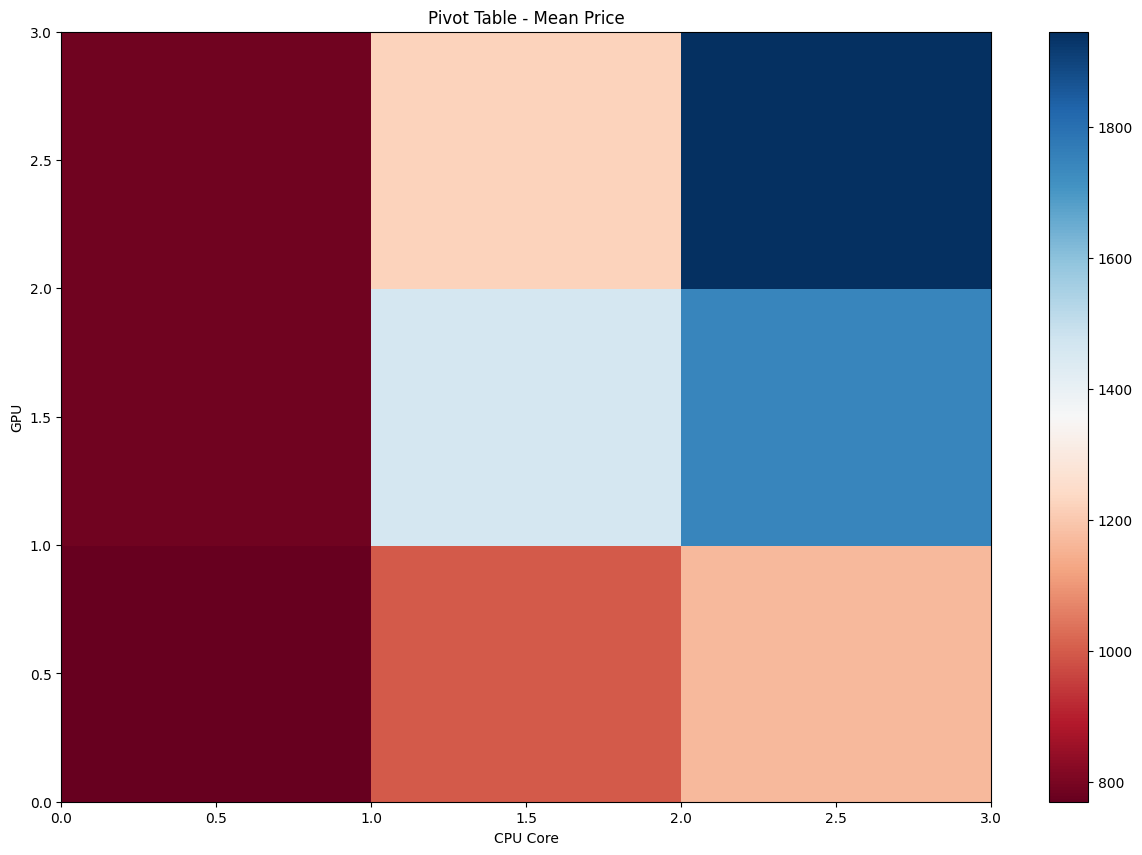

In [14]:
# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')
# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

Grouping attributes: GPU, CPU_core, and Price...
Data shape after grouping and removing NaN: (238, 3)
Unique GPU values: 3
Unique CPU_core values: 3

Creating pivot table...
Pivot Table:
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

Pivot table shape: (3, 3)

Creating pcolor plot...


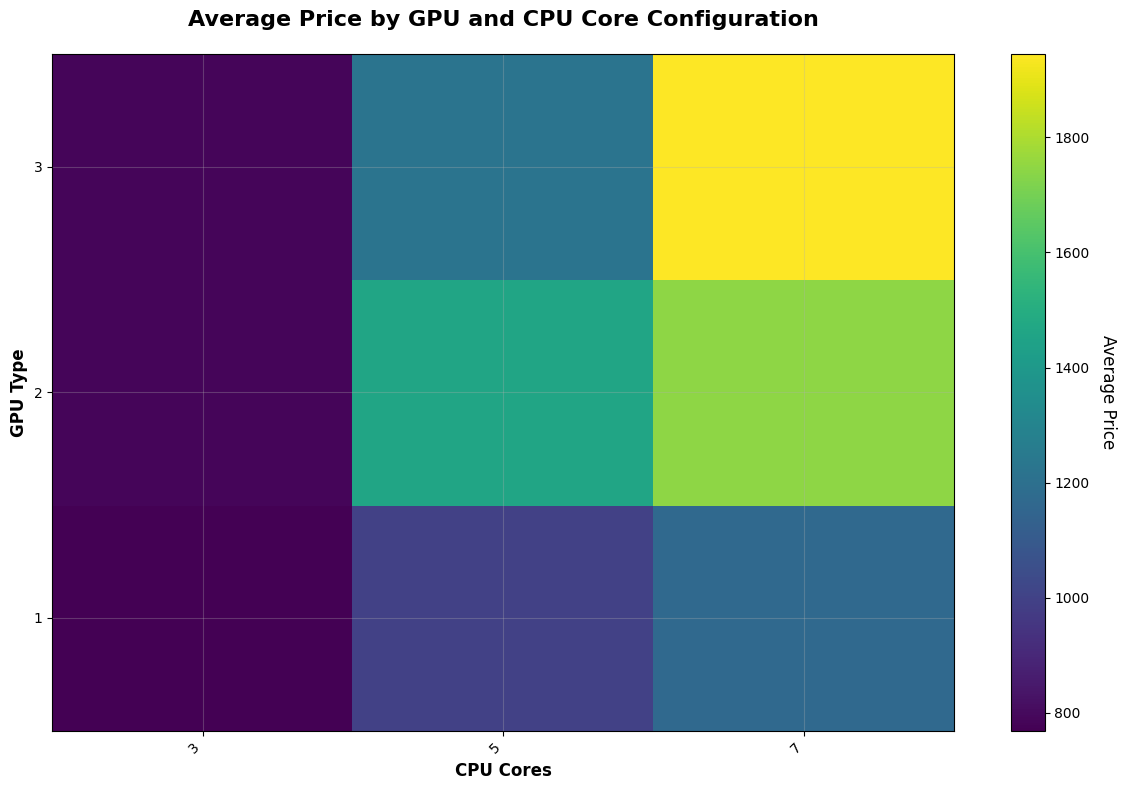

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def create_pivot_and_pcolor_plot(df):
    """
    Group GPU, CPU_core and Price attributes, create pivot table and plot pcolor visualization
    
    Parameters:
    df: DataFrame containing the data with 'GPU', 'CPU_core', and 'Price' columns
    """
    
    # 1. Group the attributes GPU, CPU_core and Price
    print("Grouping attributes: GPU, CPU_core, and Price...")
    
    # Check if required columns exist
    required_columns = ['GPU', 'CPU_core', 'Price']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        print(f"Error: Missing columns: {missing_columns}")
        return None
    
    # Create a subset with only the required columns and remove any rows with missing values
    grouped_data = df[['GPU', 'CPU_core', 'Price']].dropna()
    
    print(f"Data shape after grouping and removing NaN: {grouped_data.shape}")
    print(f"Unique GPU values: {grouped_data['GPU'].nunique()}")
    print(f"Unique CPU_core values: {grouped_data['CPU_core'].nunique()}")
    
    # 2. Create pivot table with Price as target variable and mean as aggregation function
    print("\nCreating pivot table...")
    
    pivot_table = grouped_data.pivot_table(
        index='GPU',           # Rows
        columns='CPU_core',    # Columns  
        values='Price',        # Values
        aggfunc='mean',        # Aggregation function
        fill_value=0           # Fill missing combinations with 0
    )
    
    print("Pivot Table:")
    print("=" * 50)
    print(pivot_table)
    print(f"\nPivot table shape: {pivot_table.shape}")
    
    # 3. Create pcolor plot for the pivot table
    print("\nCreating pcolor plot...")
    
    # Set up the figure
    plt.figure(figsize=(12, 8))
    
    # Create pcolor plot
    plt.pcolor(pivot_table.values, cmap='viridis', shading='auto')
    
    # Add colorbar
    colorbar = plt.colorbar()
    colorbar.set_label('Average Price', rotation=270, labelpad=20, fontsize=12)
    
    # Set labels and title
    plt.title('Average Price by GPU and CPU Core Configuration', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('CPU Cores', fontsize=12, fontweight='bold')
    plt.ylabel('GPU Type', fontsize=12, fontweight='bold')
    
    # Set ticks and labels
    plt.xticks(np.arange(0.5, len(pivot_table.columns) + 0.5), 
               pivot_table.columns, rotation=45, ha='right')
    plt.yticks(np.arange(0.5, len(pivot_table.index) + 0.5), 
               pivot_table.index, rotation=0)
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return pivot_table

def create_enhanced_pcolor_plot(df):
    """
    Enhanced version with additional customization and annotations
    """
    # Group and create pivot table
    grouped_data = df[['GPU', 'CPU_core', 'Price']].dropna()
    pivot_table = grouped_data.pivot_table(
        index='GPU',
        columns='CPU_core',
        values='Price',
        aggfunc='mean',
        fill_value=0
    )


pivot_table = create_pivot_and_pcolor_plot(df)
create_enhanced_pcolor_plot(df)

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
